In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import coo_matrix, load_npz
from scipy.sparse.linalg import lsqr

0 : (200,) (200,)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.09005579 0.         0.        ]
 [0.         0.         0.         ... 0.90994424 0.26433933 0.        ]
 [0.         0.         0.         ... 0.         0.7356607  0.43862283]]
(45, 100)


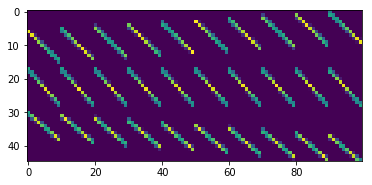

In [38]:
def construct_X(M, alphas, Np=None):
    if Np == None:
        Np = int(np.ceil(np.sqrt(2)*M))
        if Np % 2 == 0:
            Np += 1
        
    D = M*M
    N = Np*len(alphas)
    #print(N, D)

    angles = np.array(alphas)/180*np.pi

    
    a0 = 0
    b0 = 0
    s0 = 0
    
    gridX, gridY = np.meshgrid(np.linspace(-M/2, M/2, M), np.linspace(-M/2, M/2, M))
    
    C0 = a0 + gridX.flatten()
    C1 = b0 + gridY.flatten()
    C = np.stack([C0, C1], axis=0)
    
    n = np.array([np.cos(angles), np.sin(angles)]).T
    
    
    p = n.dot(C) + s0
    p = Np*(p/Np + 0.5)
    
    
    sensor1 = np.floor(p)
    sensor2 = sensor1 + 1
    weights1 = 1 - (p - np.floor(p))
    weights2 = 1 - weights1
    
    sensor = np.concatenate((sensor1, sensor2), axis=1)
    weights = np.concatenate((weights1, weights2), axis=1)

    
    i_indices = np.zeros((len(angles), sensor.shape[1]))
    j_indices = np.zeros((len(angles), sensor.shape[1]))
    for i_o, (sensor_io, weights_io) in enumerate(zip(sensor, weights)):
        if i_o % 10 == 0:
            print(i_o, ":", sensor_io.shape, weights_io.shape)
        i_indices[i_o] = sensor_io + Np*i_o
        j_indices[i_o] = np.array([np.arange(D), np.arange(D)]).flatten()
        
    
    i_indices = i_indices.flatten()
    j_indices = j_indices.flatten()
    
    
    
    weights = weights.flatten()
    
    mask = (i_indices >= 0) & (i_indices < N)
    i_indices = i_indices[mask]
    j_indices = j_indices[mask]
    weights = weights[mask]
    
    
    X = coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype=np.float32)
    return X
    
    
X = construct_X(10, [-33, 1, 42])
print(X.toarray())
print(X.toarray().shape)
plt.imshow(X.toarray())

0 : (200,) (200,)


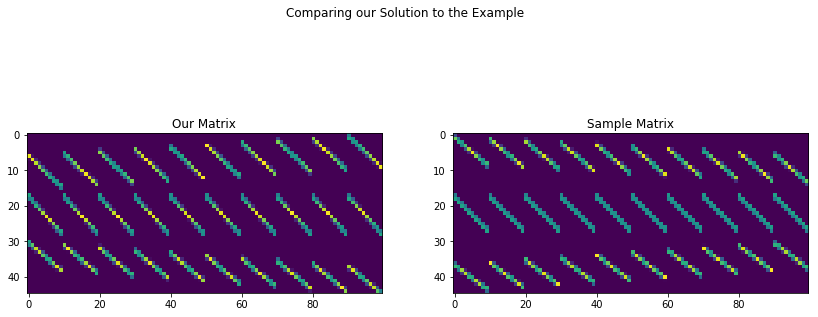

0 : (76050,) (76050,)
10 : (76050,) (76050,)
20 : (76050,) (76050,)
30 : (76050,) (76050,)
40 : (76050,) (76050,)
50 : (76050,) (76050,)
60 : (76050,) (76050,)
70 : (76050,) (76050,)
80 : (76050,) (76050,)
90 : (76050,) (76050,)
100 : (76050,) (76050,)
110 : (76050,) (76050,)
120 : (76050,) (76050,)
130 : (76050,) (76050,)
140 : (76050,) (76050,)
150 : (76050,) (76050,)
160 : (76050,) (76050,)
170 : (76050,) (76050,)
(49225, 38025)
(49225,)


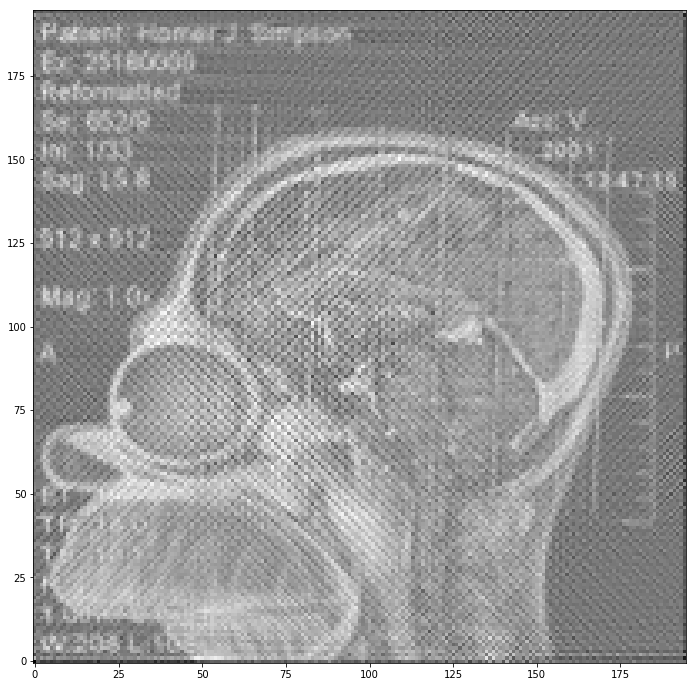

In [37]:

M = 10
alphas = [-33, 1, 42]
Np = 15

X = construct_X(M, alphas, Np)
X_example = np.load("data/X_example.npy")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(X.toarray())
axes[0].set_title("Our Matrix")
axes[1].imshow(X_example)
axes[1].set_title("Sample Matrix")
fig.suptitle("Comparing our Solution to the Example")
plt.show()


# = 77
#Np = 109
#alphas = np.load("data/alphas_77.npy")
#y = np.load("data/y_77.npy")

M = 195
Np = 275
alphas = np.load("data/alphas_195.npy")
y = np.load("data/y_195.npy")

X = construct_X(M, alphas, Np)

print(X.shape)
print(y.shape)

atol = btol = 1e-3
beta, *_ = lsqr(X.tocsc(), y, atol, btol)

beta = beta.reshape((M, M))

plt.figure(figsize=(12, 12))
plt.imshow(beta, origin="lower", cmap="gray")
plt.show()